# Chapter 01 신경망 복습

## 1.1 수학과 파이썬 복습

### 1.1.1 벡터와 행렬
- 벡터는 크기와 방향을 가진 양.
- 벡터는 숫자가 일렬로 늘어선 집합으로 표현 가능, 파이썬에서는 1차원 배열로 취급 가능.
- 행렬은 숫자가 2차원 형태(사각형 형상)로 늘어선 것

- 수학과 딥러닝 등 많은 분야에서 '열벡터'방식을 선호하나, 이 책의 경우 구현을 고려해서 '행벡터'로 다루게 됨
- 파이썬으로 구현할 때 벡터를 '행벡터'로 취급할 경우, 벡터를 가로 방향 '행렬'로 변환해 사용하면 명확해짐
    - 예를 들어 원소 수가 $N$개인 벡터라면 $1 \times N$형상의 행렬로 처리

In [1]:
import numpy as np

x = np.array([1, 2, 3])
print(x.__class__)
print(x.shape)
print(x.ndim)

W = np.array([[1, 2, 3], [4, 5, 6]])
print(W.shape)
print(W.ndim)

<class 'numpy.ndarray'>
(3,)
1
(2, 3)
2


### 1.1.2 행렬의 원소별 연산
넘파이의 다차원 배열들에서 서로 대응하는 원소끼리의 연산

In [2]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])

print(W + X)
print(W * X)
print(np.dot(W, X.T))

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]
[[ 8 26]
 [17 62]]


### 1.1.3 브로드캐스트
넘파이의 다차원 배열에서는 형상이 다른 배열끼리도 연산이 가능

In [3]:
A = np.array([[1,2], [3,4]])
print(A * 10)

[[10 20]
 [30 40]]


In [4]:
A = np.array([[1,2], [3,4]])
b = np.array([10, 20])
print(A * b)

[[10 40]
 [30 80]]


### 1.1.4 벡터의 내적과 행렬의 곱
$\mathbf{x} = (x_1, \ldots, x_n), \mathbf{y} = (y_1, \ldots, y_n)$일때, 두 벡터의 내적은 다음과 같이 쓴다
\begin{equation}
    \mathbf{x} \cdot \mathbf{y} = x_1 y_1 + x_2 y_2 + \cdots + x_n y_n
    \tag{1.1}
\end{equation}

행렬의 곱셈은 다음과 같이 계산한다.

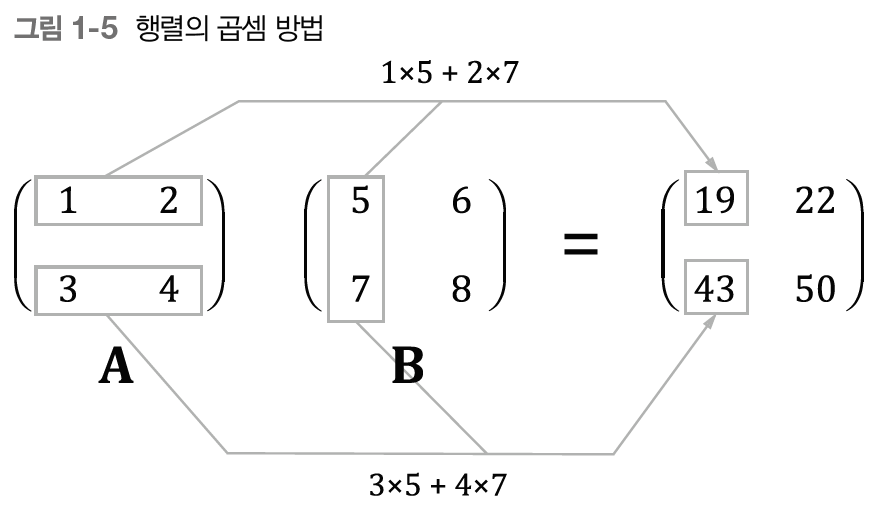

In [5]:
from PIL import Image
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-5.png")

벡터의 내적과 행렬의 곱은 넘파이의 `np.dot()`과 `np.matmul()`을 통해 쉽게 구현 가능하다.

In [6]:
# 벡터의 내적
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.dot(a, b))

# 행렬의 곱
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
print(np.dot(A, B))

32
[[19 22]
 [43 50]]


### 1.1.5 행렬 형상 확인
행렬이나 벡터를 사용해 계산할 때는 그 '형상'에 주의해야 한다. 다음과 같이 차원이 일치하는지 '형상 확인'이 중요하다.

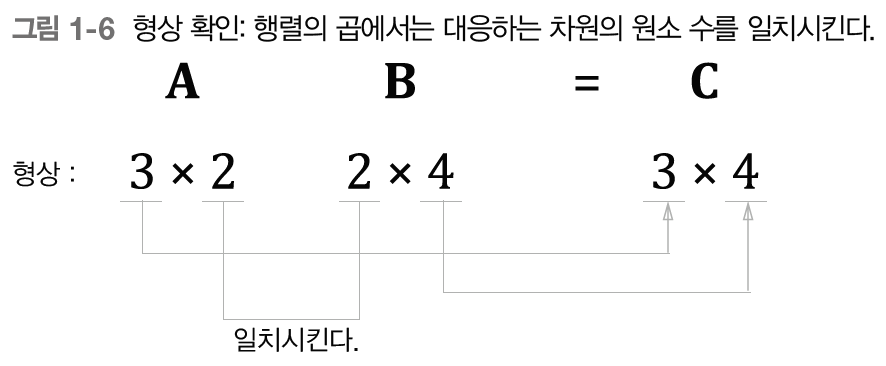

In [7]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-6.png")

## 1.2 신경망의 추론
이제 신경망을 복습할 차례이다. 신경망에서 수행하는 작업은 크게 두 단계로 나눌 수 있다. '학습'과 '추론'인데, 이번 절은 '추론'을 위주로 다룬다.

### 1.2.1 신경망 추론 전체 그림
신경망은 간단히 말하면 단순한 '함수'라 할 수 있다. 함수란 무엇인가를 입력하면 무엇인가를 출력하는 변환기로 볼 수 있으며 신경망 또한 함수처럼 입력된 값을 기반으로 출력 값을 만드는 역할을 한다.

이번 절에서는 2차원 데이터를 입력해서 3차원 데이터를 출력하는 함수를 예로 들어보도록 한다. 이 함수를 신경망으로 구현하려면 입력층에는 뉴런 2개, 출력층에는 3개를, 그리고 은닉층에도 적당한 수의 뉴런을 배치해야 한다. (예를 들어 4개) 그러면 신경망은 다음 그림처럼 그릴 수 있다.

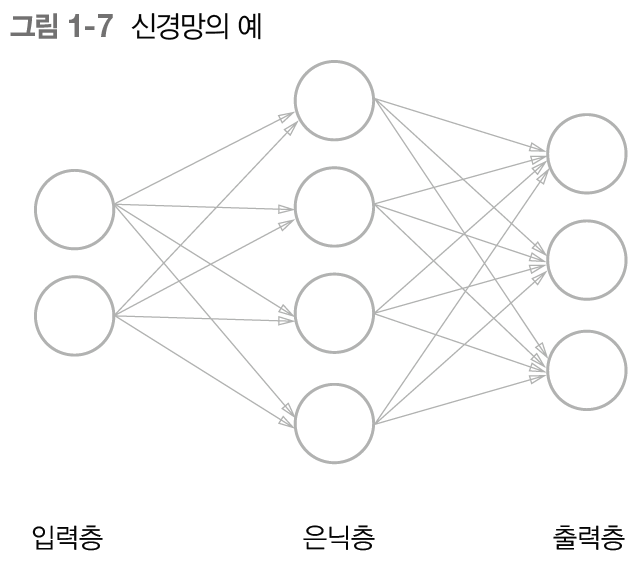

In [8]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-7.png")

그림의 각 뉴런에는 이전 층의 뉴런에 대응되는 가중치와 편향이 존재하며, 가중치와 뉴런의 값을 곱한 값에 편향이 더해진 뒤 활성화 함수가 적용된 후에 다음 뉴런으로 출력값이 전달된다. 위와 같이 인접하는 층의 모든 뉴런과 연결된 계층을 $\text{완전연결계층}^{\text{fully connected layer}}$이라고 한다.

신경망이 수행하는 계산을 수식으로 나타내면 다음과 같다.
\begin{equation}
    (h_1, h_2, h_3, h_4) = (x_1, x_2)
    \begin{pmatrix}
        w_{11} & w_{12} & w_{13} & w_{14} \\
        w_{21} & w_{22} & w_{23} & w_{24}
    \end{pmatrix}
    +
    (b_1, b_2, b_3, b_4)
    \tag{1.2}
\end{equation}

여기에서 은닉층의 뉴런들은 $(h_1, h_2, h_3, h_4)$로 정리되며, $1 \times 4$행렬로 간주할 수 있다. 또 입력 $(x_1, x_2)$는 $1 \times 2$행렬이며, 가중치는 $2 \times 4$행렬, 편향은 $1 \times 4$행렬에 대응된다. 그러면 식 (1.2)는 다음과 같이 간소화해서 표현할 수 있다.

\begin{equation}
    \mathbf{h} = \mathbf{x} \mathbf{W} + \mathbf{b}
    \tag{1.3}
\end{equation}

여기서 $\mathbf{x}$는 입력, $\mathbf{h}$는 은닉층의 뉴런, $\mathbf{W}$는 가중치, $\mathbf{b}$는 편향을 뜻한다. 그리고 식 (1.3)의 각 행렬의 형상을 잘 보면 다음 그림과 같이 변환된다는 사실을 알 수 있다.

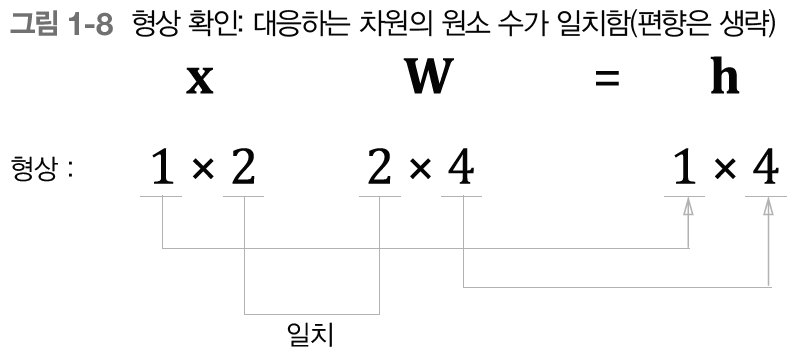

In [9]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-8.png")

위 그림에서 보다시피, 행렬의 곱에서는 대응하는 차원의 원소 수가 일치해야 한다. 그래야 계산이 성립하기 때문이다.

지금까지 완전연결계층에 의한 변환을 행렬로 정리 및 계산해보았는데, 하나의 샘플 데이터(입력 데이터)만을 대상으로 했기에, 이제 이를 다수의 샘플 데이터($\text{미니 배치}^{\text{minibatch}}$)로 개념을 확장해보자. 신경망의 추론이나 학습에서는 다수의 샘플 데이터를 한꺼번에 처리하는데, 이를 위해서는 행렬 $\mathbf{x}$의 행 각각에 샘플 데이터를 하나씩 저장해야 한다. 예를 들어 $N$개의 샘플 데이터를 미니배치로 한꺼번에 처리하게 되면 다음과 같이 쓸 수 있다.

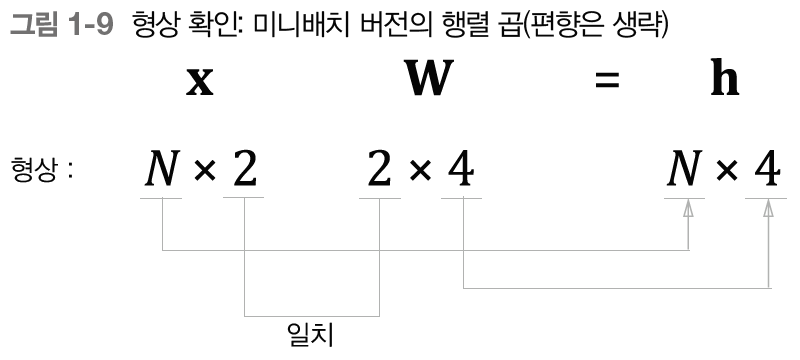

In [10]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-9.png")

즉 위와 같이 $N$개의 샘플 데이터가 한꺼번에 완전연결계층에 의해 변환되고, 은닉층에서는 $N$개의 뉴런에 대한 출력이 계산되는 것이다. 이를 파이썬으로는 다음과 같이 구현해볼 수 있다.

In [11]:
import numpy as np
W1 = np.random.randn(2,4)   # 가중치
b1 = np.random.randn(4)      # 편향
x = np.random.randn(10,2)    # 입력
h = np.matmul(x, W1) + b1
print(h.shape)

(10, 4)


완전연결계층에 의한 변환은 '선형'변환이므로 '비선형'효과를 부여하기 위해 다음과 같은 $\text{시그모이드 함수}^{\text{sigmoid function}}$를 사용해보자.
\begin{equation}
    \sigma(x) = \cfrac{1}{1 + \exp(-x)}
    \tag{1.4}
\end{equation}
시그모이드 함수는 다음 그림과 같이 알파벳 'S'자 모양의 비선형 함수이다.

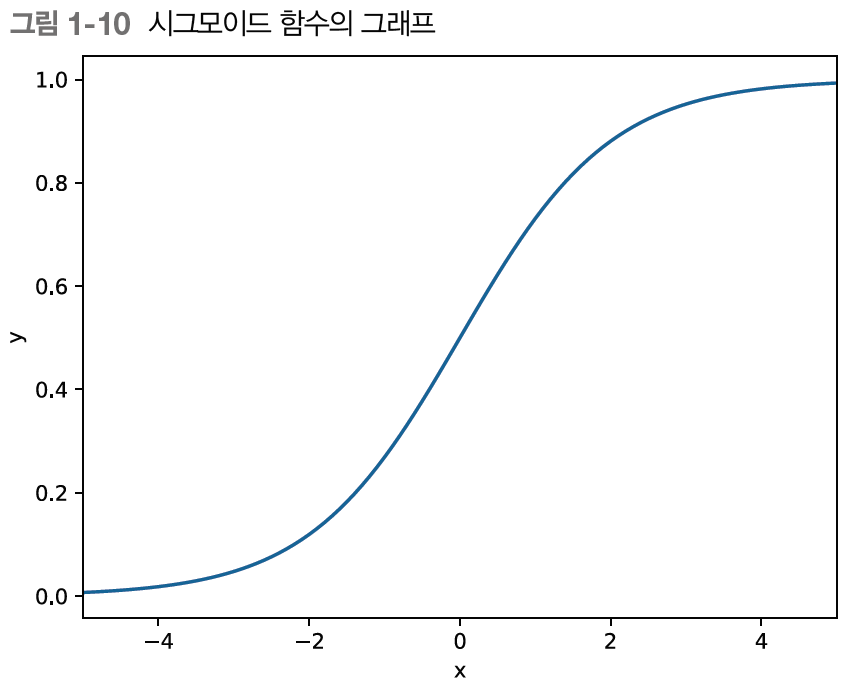

In [12]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-10.png")

파이썬 구현은 다음과 같다.

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

좀 전에 얻은 은닉층 뉴런 값에 시그모이드 함수를 씌움으로써 비선형 변환을 할 수 있게된다.

In [14]:
a = sigmoid(h)
print(a)

[[0.45324498 0.80777299 0.25902587 0.7454821 ]
 [0.59234839 0.30516447 0.38436049 0.58375429]
 [0.51652442 0.21416206 0.837363   0.27203431]
 [0.38388485 0.45860681 0.92742376 0.21093403]
 [0.4752237  0.32067935 0.83642807 0.2923498 ]
 [0.60821367 0.40374341 0.1990316  0.72213344]
 [0.62333476 0.19692504 0.43721976 0.52688931]
 [0.59086483 0.20578499 0.5755703  0.44774457]
 [0.40579942 0.69769722 0.66841459 0.48520603]
 [0.57239343 0.41628753 0.31545648 0.64599758]]


지금까지의 내용을 정리해서 파이썬으로 쓰면 다음과 같다.

In [15]:
import numpy as np

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1 # 형상 (10, 4)
a = sigmoid(h) # 활성화 함수를 적용, 형상 (10, 4)
s = np.matmul(a, W2) + b2 # 출력층 형상 (10, 3)
print(h.shape)
print(a.shape)
print(s.shape)

(10, 4)
(10, 4)
(10, 3)


이 신경망은 3차원 데이터를 출력하게 되는데, 각 차원의 값을 이용하여 3 클래스 분류를 할 수 있다. 이 경우에 출력된 3차원 벡터의 각 차원은 각 클래스에 대응하는 '$\text{점수}^{\text{score}}$'가 된다. 예를 들어 분류를 하게 될때 출력층에서 가장 큰 값을 내뱉는 뉴런에 해당하는 클래스가 예측 결과가 되는 것이다.

### 1.2.2 계층으로 클래스화 및 순전파 구현

- 완전연결계층에 의한 변환 : Affine 계층
- 시그모이드 함수에 의한 변환 : Sigmoid 계층

$\textbf{NOTE}$
```
- 순전파 : 입력층에서 출력층으로 향하는 전파. 순전파 때는 신경망을 구성하는 각 계층이 입력으로부터 출력 방향으로 처리 결과를 차례로 전파
- 역전파 : 데이터(기울기)를 순전파와 반대 방향으로 전파
```

신경망의 다양한 계층들은 파이썬의 클래스를 활용한 모듈화를 통해 구현하게 되면 나중에 레고를 조립하듯 신경망 구축이 가능. 계층 구현시에는 다음과 같은 '구현 규칙'을 따르도록 함 :

- 모든 계층은 `forward()`와 `backward()`메서드를 가짐 (각각 순전파, 역전파 수행)
- 모든 계층은 인스턴스 변수인 `params`와 `grads`를 가짐 (params는 가중치와 편향 같은 매개변수를 담는 리스트, grads는 params에 저장된 각 매개변수에 대응되는 기울기를 보관하는 리스트)

이번 절은 순전파만 구현하므로 `forward()`와 `params`만 다루는 구현을 해보도록 함.

In [16]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    

class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

위와 같은 Sigmoid 계층과 Affine 계층을 이용해서 다음 그림과 같은 신경망의 추론 처리를 구현해보자.

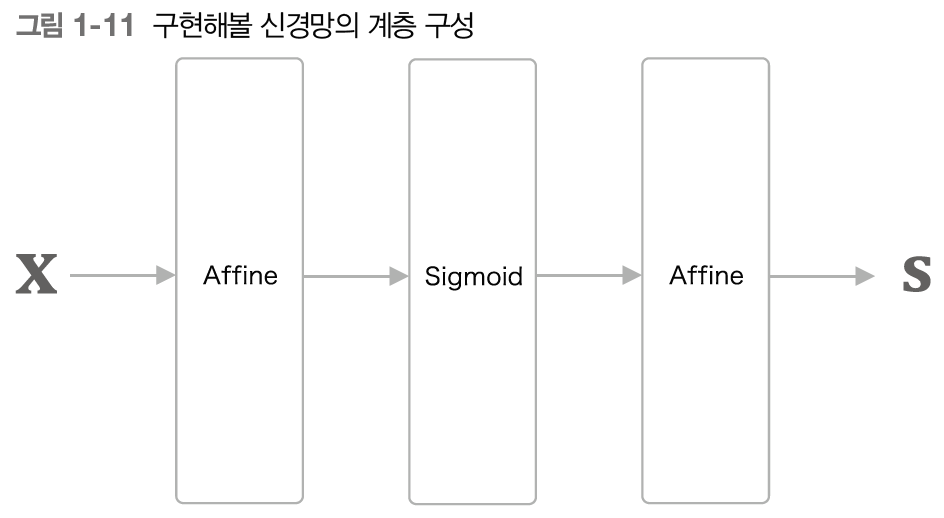

In [17]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-11.png")

In [18]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params
        
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

다음과 같은 간단한 예를 통해 TwoLayerNet 클래스를 활용한 신경망의 추론을 수행해 볼 수 있다.

In [19]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

## 1.3 신경망의 학습

### 1.3.1 손실 함수

신경망 학습에는 학습이 얼마나 잘 되고 있는지를 알기 위한 '척도'가 필요하다. 일반적으로 학습 단계의 특정 시점에서 신경망의 성능을 나타내는 척도로 손실을 사용한다.

신경망의 손실은 손실 함수를 사용해 구한다. 다중 클래스 분류 신경망에서는 손실 함수로 흔히 교차 엔트로피 오차를 이용한다. 교차 엔트로피 오차는 신경망이 출력하는 각 클래스의 '확률'과 '정답 레이블'을 이용해서 구할 수 있다.

앞 절의 신경망에 Softmax 계층과 Cross Entropy Error 계층을 새로 추가하고 '계층 관점'에서 이 신경망을 그리면 다음 그림과 같다.

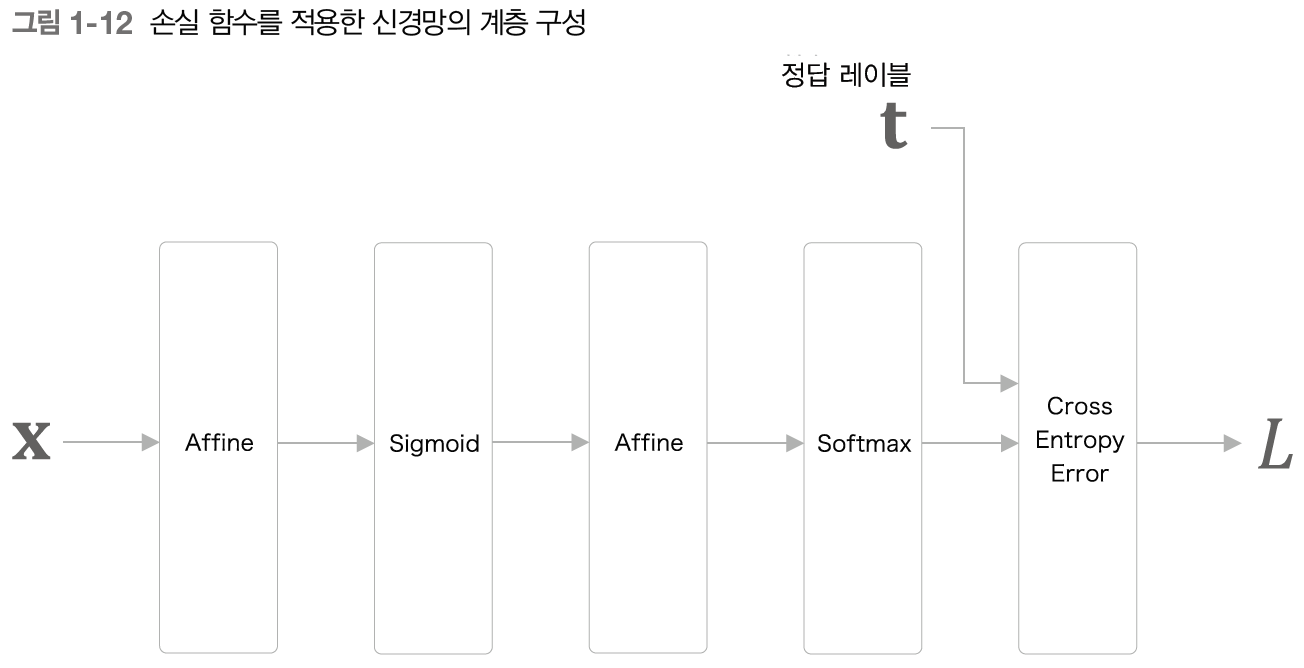

In [20]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-12.png")

소프트맥스 함수와 교차 엔트로피 오차를 식으로 쓰면 다음과 같다.

\begin{equation*}
    y_k = \cfrac{\exp(s_k)}{\displaystyle\sum_{i=1}^{K}\exp(s_i)}
    \tag{1.6}
\end{equation*}

\begin{equation*}
    L = -\displaystyle\sum_{k=1}^{K}t_k \log y_k
    \tag{1.7}
\end{equation*}

출력이 총 $n$개일 대, $k$번째의 출력 $y_k$를 계산하며 $t_k$는 $k$번째 클래스에 해당하는 정답 레이블이다. 정답 레이블은 `t = [0, 0, 1]`과 같이 원-핫 벡터로 표기한다.

미니배치 처리까지 고려하면 교차 엔트로피 오차식은 다음과 같게 된다. 여기서 데이터는 $N$개이며, $t_{nk}$는 $n$번째 데이터의 $k$차원째의 값을 의미한다. 그리고 $y_{nk}$는 신경망의 출력이고 $t_{nk}$는 정답 레이블이다.

\begin{equation*}
    L = -\cfrac{1}{N} \displaystyle\sum_{n=1}^{N} \displaystyle\sum_{k=1}^{K} t_{nk} \log y_{nk}
    \tag{1.8}
\end{equation*}

식 (1.8)은 하나의 데이터에 대한 손실함수를 데이터 $N$개 짜리로 확장한 경우이다. 이때 $N$개의 데이터에 대한 손실함수 값의 평균을 구해서 미니배치의 크기에 상관없이 일관된 척도를 얻을 수 있다는 장점을 가진다.

이 책에서는 소프트맥스 함수와 교차 엔트로피 오차를 계산하는 계층을 Softmax with Loss 계층 하나로 구현한다(이 두 계층을 통합하면 역전파 계산이 쉬워진다). 그림으로 신경망의 계층 구성을 다시 표현하면 다음과 같다.

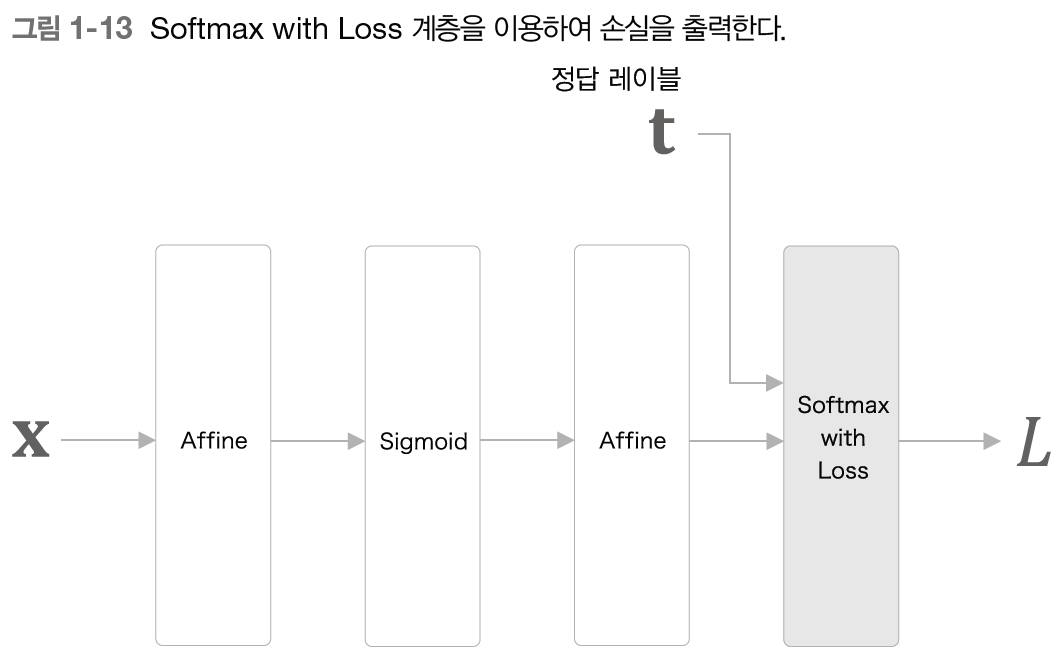

In [21]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-13.png")

### 1.3.2 미분과 기울기

신경망 학습의 목표는 손실을 최소화하는 매개변수를 찾는 것이다. 이때 중요한 것이 '미분'과 '기울기'이다.

$y = x^{2}$이라는 함수를 예로 들어보면, 이 함수의 미분을 해석적으로 구하면 $\tfrac{dy}{dx} = 2x$가 된다. 이 미분 결과는 각 $x$에서의 변화량을 뜻하며, [그림 1-14]에서 보듯 함수의 '기울기'에 해당한다.

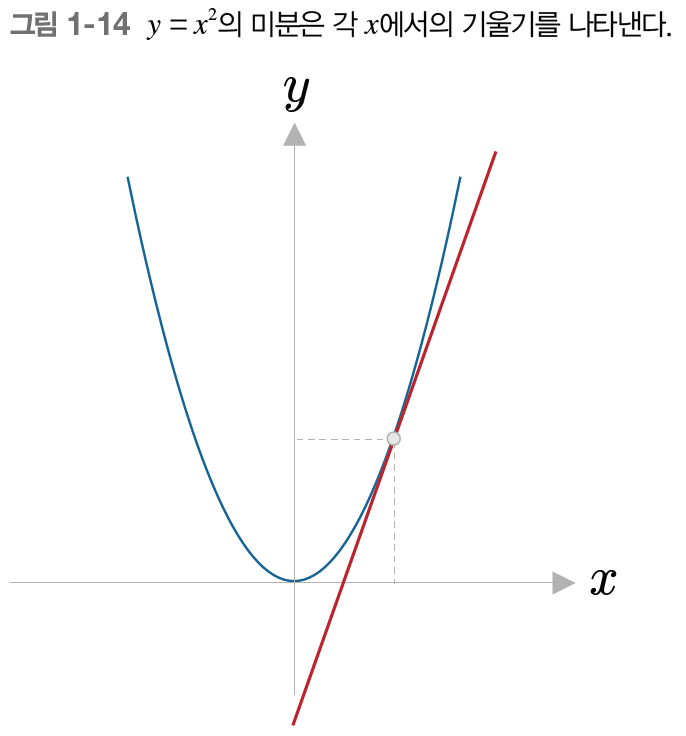

In [22]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-14.png")

여러 개의 변수(다변수)에 대해서도 미분할 수 있다. 예를 들어 $L$은 스칼라, $x$는 벡터인 함수 $L = f(x)$가 있다. 이때 $x_i$ ($x$ 의 $i$번째 원소)에 대한 미분은 $\tfrac{\partial L}{\partial x_i}$로 쓸 수 있다. 이를 다음과 같이 정리할 수 있다.

\begin{equation*}
    \cfrac{\partial L}{\partial \mathbf{x}} = \left( \cfrac{\partial L}{\partial x_1}, \cfrac{\partial L}{\partial x_2}, \cdots, \cfrac{\partial L}{\partial x_n} \right)
    \tag{1.9}
\end{equation*}

이처럼 벡터의 각 원소에 대한 미분을 정리한 것이 기울기(gradient)이다.

행렬에 대해서도 기울기를 생각할 수 있다. $\mathbf{W}$가 $m \times n$행렬이면, $L = g(\mathbf{W})$ 함수의 기울기는 다음과 같다.

\begin{equation*}
    \cfrac{\partial L}{\partial \mathbf{W}} 
    = 
    \begin{pmatrix}
    \cfrac{\partial L}{\partial W_{11}} & \cdots & \cfrac{\partial L}{\partial W_{1n}} \\
    \vdots & & \vdots \\
    \cfrac{\partial L}{\partial W_{m1}} & \cdots & \cfrac{\partial L}{\partial W_{mn}}
    \end{pmatrix}
    \tag{1.10}
\end{equation*}

식 (1.10) 처럼 $L$의 $\mathbf{W}$ 에 대한 기울기를 행렬로 정리할 수 있다. 중요한 점은 $\mathbf{W}$와 $\tfrac{\partial L}{\partial \mathbf{W}}$의 형상이 같다는 것이다. 그리고 '행렬과 그 기울기의 형상이 같다'라는 성질을 이용하면 매개변수 갱신과 연쇄 법칙을 쉽게 구현할 수 있다.

### 1.3.3 연쇄법칙

올바른 신경망 학습을 위해선 손실을 줄여나가는 과정이 있어야 하는데, 이때 필요한 것이 매개변수에 대한 손실의 기울기이다. 이 기울기를 통해 매개변수를 갱신할 수 있기 때문이다. 이러한 기울기는 $\textbf{오차역전파법}^{\text{backpropagation}}$을 통해 구할 수 있다.

오차역전파법에는 $\textbf{연쇄법칙}^{\text{chain rule}}$이 사용된다. 연쇄 법칙이란 합성함수에 대한 미분의 법칙이다.

연쇄법칙은 다음과 같다. 예를 들어, $y=f(x)$와 $z=g(y)$라는 두 함수가 있다. 그러면 $z=g(f(x))$가 되어, 최종 출력 $z$는 두 함수를 조합해 계산할 수 있다. 이때 이 합성함수의 미분 ($x$에 대한 $z$의 미분)은 다음과 같이 구할 수 있다.

\begin{equation*}
    \cfrac{\partial z}{\partial x} = \cfrac{\partial z}{\partial y} \cfrac{\partial y}{\partial x}
    \tag{1.11}
\end{equation*}

식 (1.11)에서와 같이, $x$에 대한 $z$의 미분은 $y=f(x)$의 미분과 $z=g(y)$의 미분을 곱하면 구해진다. 이것이 연쇄 법칙이다. 연쇄 법칙이 중요한 이유는 함수가 아무리 복잡해도, 그 미분은 개별 함수의 미분들로 구할 수 있기 때문이다. 달리 말하면, 각 함수의 국소적인 미분을 계산할 수 있다면, 그 값들을 곱해서 전체의 미분을 계산할 수 있다는 것이다.

### 1.3.4 계산 그래프
계산 그래프는 계산 과정을 시각적으로 보여준다. 다음과 같은 아주 쉬운 계산 그래프를 예로 들어본다.

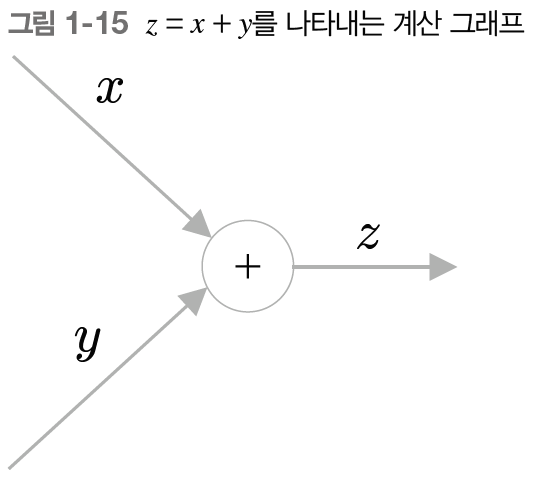

In [23]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-15.png")

계산 그래프는 [그림 1-15]와 같이 노드와 화살표로 그린다. 더하기를 '+'노드로 나타내고, 변수 $x$와 $y$를 화살표 위에 쓴다. 이와 같이 계산 그래프는 연산을 노드로 나타내고, 그 처리 결과가 순서대로 흐른다. 이것을 '순전파'라고 부른다. 기울기는 순전파와 반대 방향으로 전파되는데, 이 반대 방향의 전파를 '역전파'라고 부른다.

역전파에 좀 더 자세히 살펴보고자 한다. 지금 다뤄지는 계산은 $z= x + y$이지만, 이 계산 앞뒤로도 '어떤 계산'이 있다고 가정한다. 그리고 최종적으로 스칼라 값인 $L$이 출력된다고 가정한다.

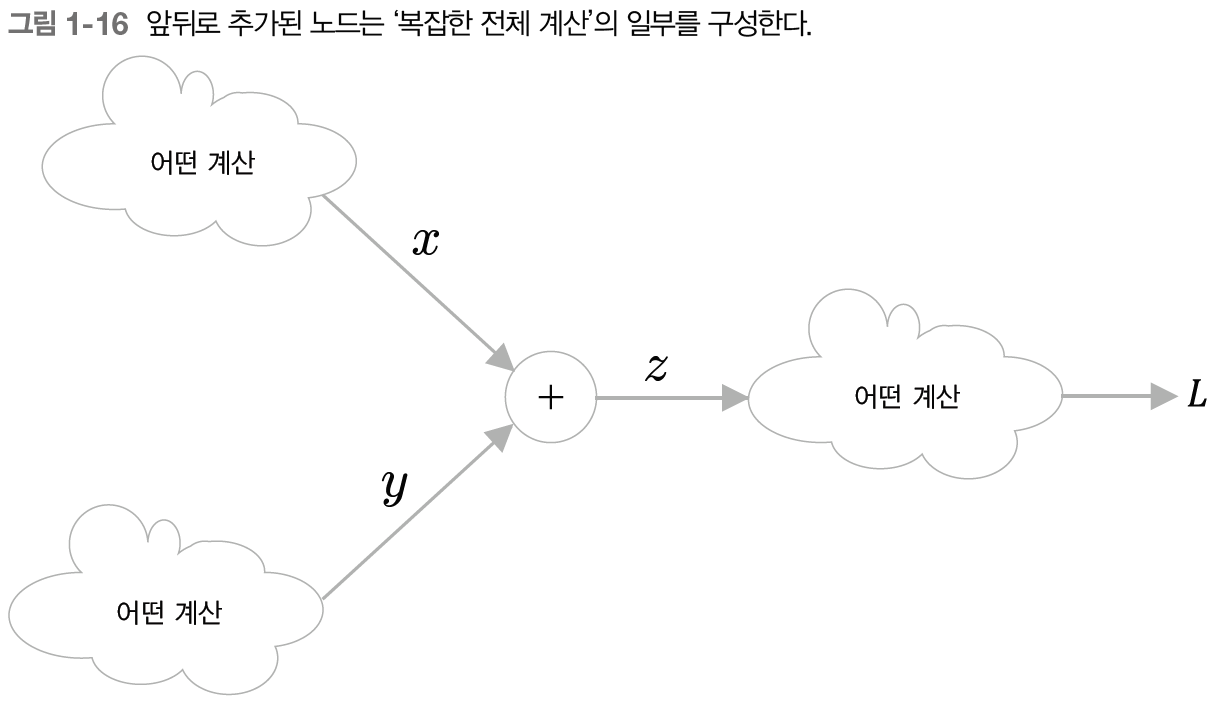

In [24]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-16.png")

목표는 $L$의 미분을 각 변수에 대해서 구하는 것이다. 그러면 계산 그래프의 역전파는 [그림 1-17]처럼 그릴 수 있다.

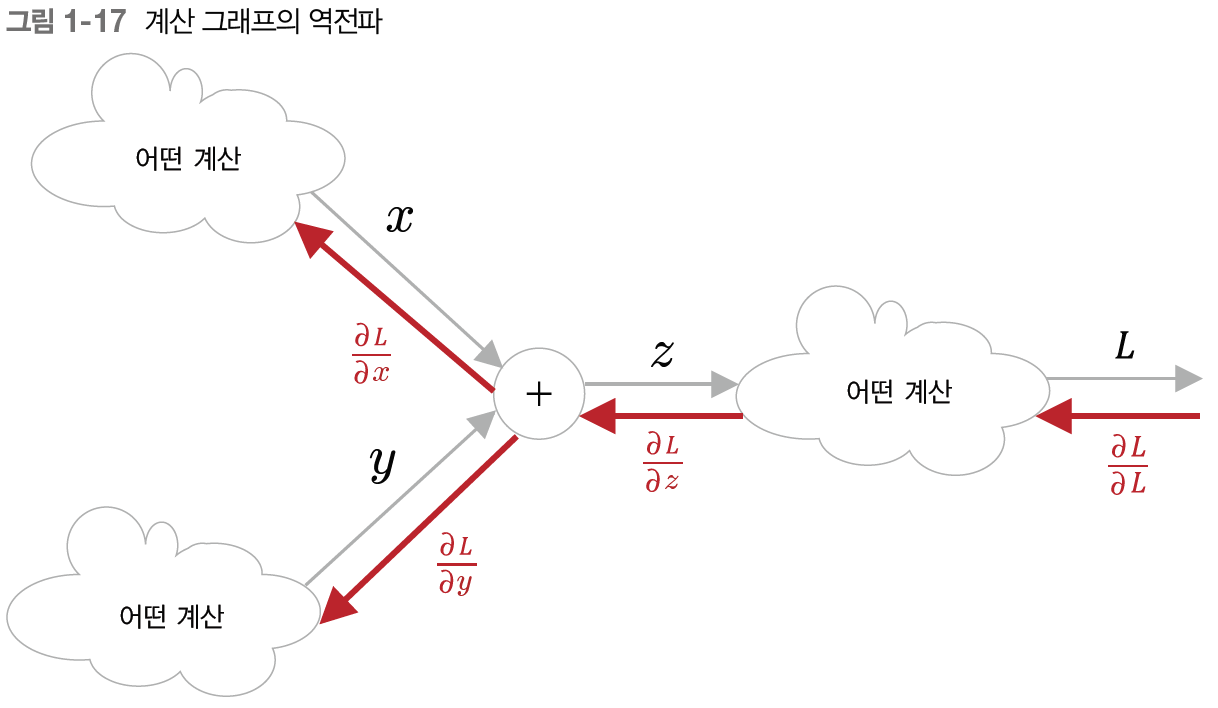

In [25]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-17.png")

이때 '전파되는 값'은 최종 출력 $L$의 각 변수에 대한 미분이다. 이 예에서 $z$에 대한 미분은 $\tfrac{\partial L}{\partial z}$이고, $x$와 $y$에 대한 미분은 각각 $\tfrac{\partial L}{\partial x}$과 $\tfrac{\partial L}{\partial y}$이다.

그리고 여기서 다시 연쇄 법칙이 등장한다. 앞서 복습한 연쇄 법칙에 따르면 역전파로 흐르는 미분 값은 상류로부터 흘러온 미분과 각 연산 노드의 국소적인 미분을 곱해서 계산할 수 있다(여기서 '상류'는 출력을 가리킨다). 그러므로 이 예에서 $\tfrac{\partial L}{\partial x} = \tfrac{\partial L}{\partial z} \tfrac{\partial z}{\partial x}$ 이고, $\tfrac{\partial L}{\partial y} = \tfrac{\partial L}{\partial z} \tfrac{\partial z}{\partial y}$ 가 된다.

그런데 우리는 지금 $z = x + y$ 의 덧셈 노드에서 이뤄지는 연산을 다루고 있다. 따라서 $\tfrac{\partial z}{\partial x} = 1$ 과 $\tfrac{\partial z}{\partial y} = 1$ 이라는 결과를 (해석적으로) 구할 수 있다. 이 결과를 적용하면 덧셈 노드는 [그림 1-18]처럼 상류로부터 받은 값에 1을 곱해서 하류로 기울기를 전파한다. 즉, 상류로부터의 기울기를 그대로 흘리기만 한다.

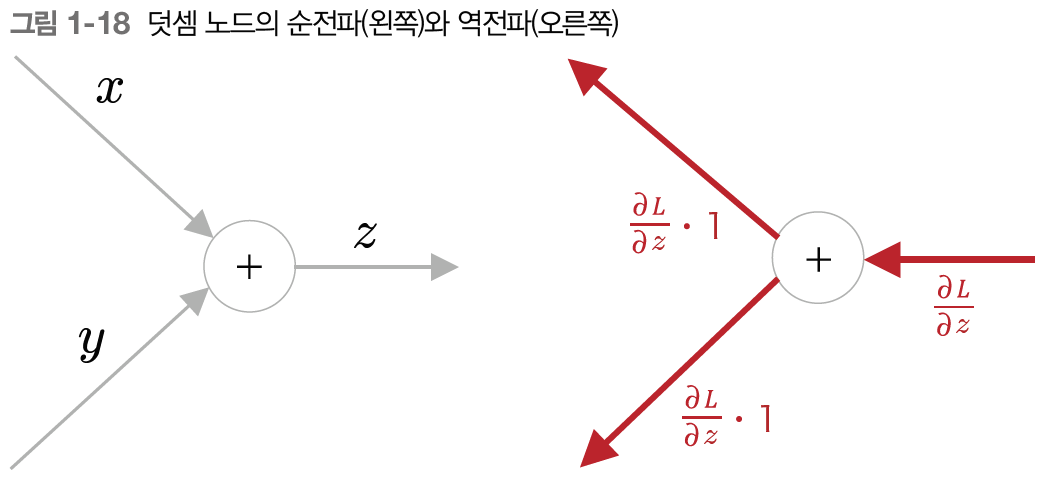

In [26]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-18.png")

이와 같이 계산 그래프는 계산을 시각적으로 보여주며, 역전파에 의한 기울기 흐름을 살펴볼 수 있기에 그 도출 과정을 이해하는 데도 좋다.

계산 그래프를 구축하는 연산 노드로는 여기서 본 '덧셈 노드'외에도 다양한 연산을 생각할 수 있다. 이어서 대표적인 연산 노드 몇 가지를 더 알아본다.

#### 곱셈 노드

곱셈 노드는 $z = x \times y$ 계산을 수행한다. 이때 $\tfrac{\partial z}{\partial x} = y$ 와 $\tfrac{\partial z}{\partial y} = x$ 라는 미분 결과를 각각 구할 수 있다. 따라서 곱셈 노드의 역전파는 [그림 1-19]처럼 '상류로부터 받은 기울기'에 '순전파 시의 입력을 서로 바꾼 값'을 곱한다.

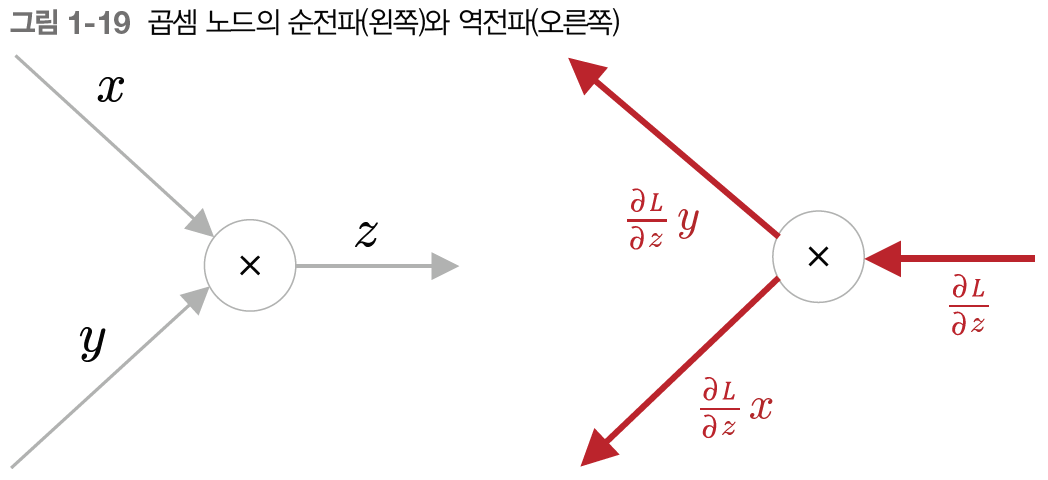

In [27]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-19.png")

지금까지 살펴본 덧셈 노드와 곱셈 노드 설명에서는 값이 하나짜리 데이터만 예로 들었다. 그러나 벡터나 행렬 혹은 텐서 같은 다변수를 흘려도 상관없다. 덧셈 노드(또는 곱셈 노드)를 흐르는 데이터가 텐서라면 텐서의 각 원소를 독립적으로 계산할 뿐이다. 다시 말해, 이 경우는 텐서의 다른 원소들과는 독립적으로, '원소별 연산'을 수행한다.

#### 분기 노드

분기 노드는 [그림 1-20]과 같이 분기하는 노드이다.

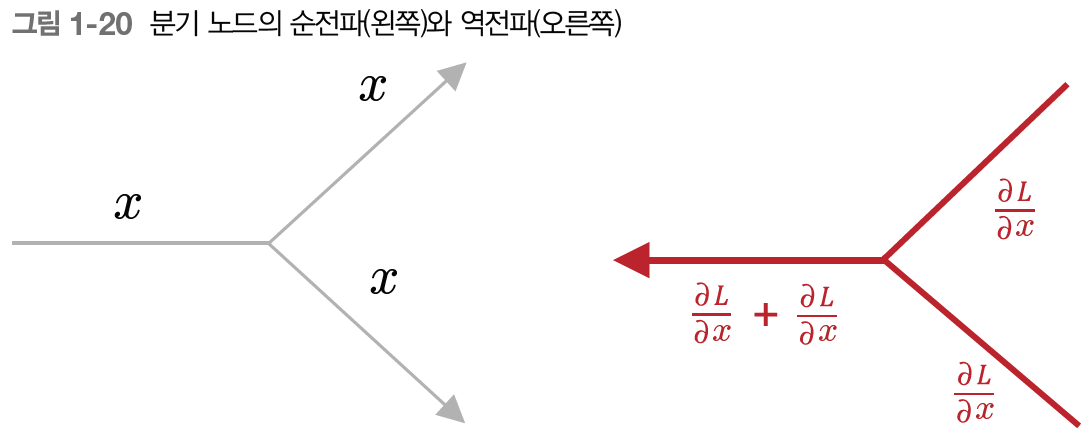

In [28]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-20.png")

분기 노드는 따로 그리지 않고 단순히 선이 두 개로 나뉘도록 그리는데, 이때 같은 값이 복제되어 분기한다. 따라서 분기 노드를 '복제 노드'라고 할 수도 있다. 그리고 그 역전파는 [그림 1-20]에서 보듯 상류에서 온 기울기들의 '합'이 된다.

#### Repeat 노드

2개로 분기하는 분기 노드를 일반화하면 $N$개로의 분기가 된다. 이를 Repeat 노드라고 한다. Repeat 노드의 예를 계산 그래프로 그리면 다음과 같다.

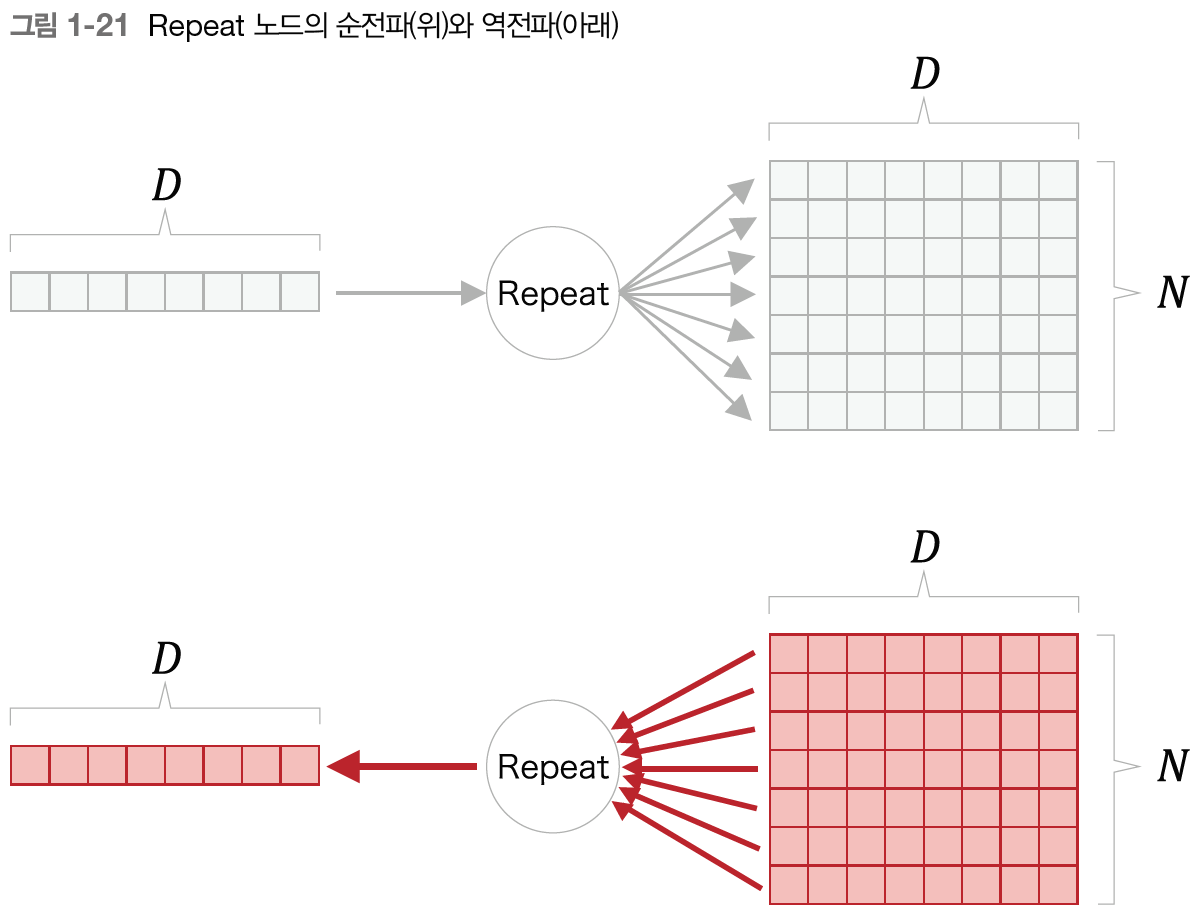

In [29]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-21.png")

[그림 1-21]은 길이가 $D$인 배열을 $N$개로 복제하는 예이다. 이 Repeat 노드는 $N$개의 분기 노드로 볼 수 있으므로, 그 역전파는 $N$개의 기울기를 모두 더해서 구할 수 있다. 코드로는 다음과 같이 구현할 수 있다.

In [30]:
import numpy as np

D, N = 8, 7
x = np.random.randn(1, D)   # 입력
y = np.repeat(x, N, axis=0) # 순전파
dy = np.random.randn(N, D)  # 무작위 기울기
dx = np.sum(dy, axis=0, keepdims=True) # 역전파, keepdims = True를 통해 2차원 배열의 차원 수 유지

In [31]:
dx.shape

(1, 8)

#### Sum 노드

Sum 노드는 범용 덧셈 노드이다. 예컨대 $N \times D$ 배열에 대해 그 총합을 0축에 대해 구하는 계산을 생각해본다. 이때 Sum 노드의 순전파와 역전파는 [그림 1-22]처럼 된다.

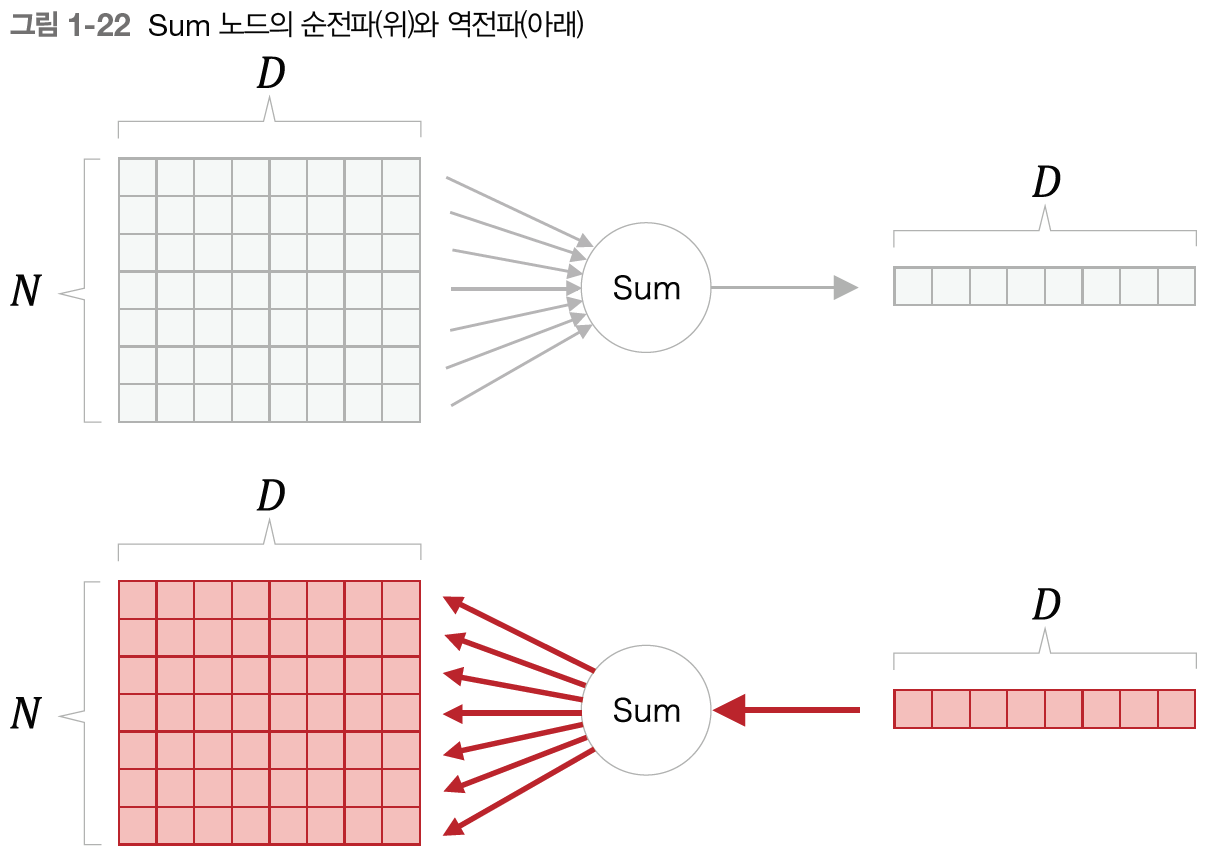

In [32]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-22.png")

[그림 1-22]에서 보듯, Sum 노드의 역전파는 상류로부터의 기울기를 모든 화살표에 분배한다. 덧셈 노드의 역전파를 자연스럽게 확장한 것이다. 그럼 Repeat 노드와 마찬가지로 Sum 노드의 구현 예도 보도록 한다.

In [33]:
import numpy as np
N, D = 7, 8
x = np.random.randn(N, D)   # 입력
y = np.sum(x, axis=0, keepdims=True) # 순전파

dy = np.random.randn(1, D)  # 무작위 기울기
dx = np.repeat(dy, N, axis=0) # 역전파

In [34]:
dx.shape

(7, 8)

#### MatMul 노드

MatMul 노드('Matrix Multiply')는 행렬의 곱셈 역할을 하는 노드이다. MatMul 노드의 역전파는 다소 복잡하다.

$\mathbf{y} = \mathbf{x} \mathbf{W}$ 라는 계산을 예로 들어본다. 여기서 $\mathbf{x}, \mathbf{W}, \mathbf{y}$ 의 형상은 각각 $1 \times D, D \times H, 1 \times H$ 이다.

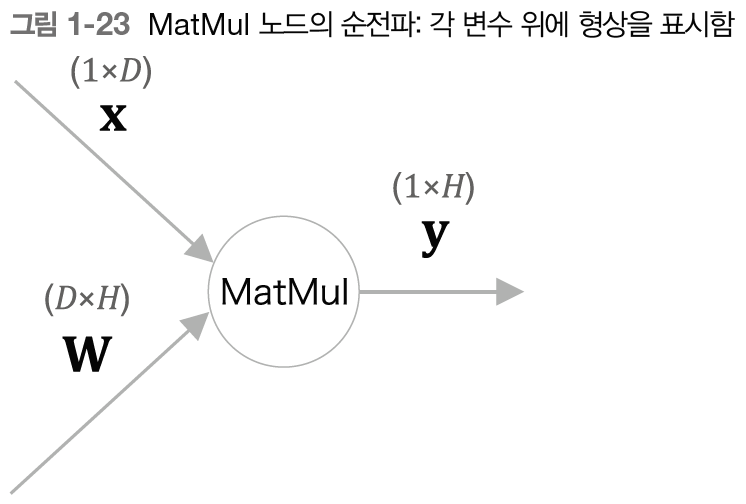

In [35]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-23.png")

이때 $\mathbf{x}$ 의 $i$ 번째 원소에 대한 미분 $\tfrac{\partial L}{\partial x_i}$ 은 다음과 같이 구한다.

\begin{equation*}
    \cfrac{\partial L}{\partial x_i} = \displaystyle\sum_{j=1}^{H} \cfrac{\partial L}{\partial y_j} \cfrac{\partial y_j}{\partial x_i}
    \tag{1.12}
\end{equation*}

위 식에서 볼 수 있는 것처럼 $x_i$ 에서 $L$에 이르는 연쇄 법칙의 경로는 $H$개 존재하고, 그 총합이 $\tfrac{\partial L}{\partial x_i}$ 가 된다.

$\tfrac{\partial y_j}{\partial x_i} = W_{ij}$ 가 성립하므로, 이를 식 (1.12)에 대입하면 다음과 같게 된다.

\begin{equation*}
    \cfrac{\partial L}{\partial x_i} = \displaystyle\sum_{j=1}^{H} \cfrac{\partial L}{\partial y_j} \cfrac{\partial y_j}{\partial x_i} = \displaystyle\sum_{j=1}^{H} \cfrac{\partial L}{\partial y_j} W_{ij}
    \tag{1.13}
\end{equation*}

식 (1.13)으로부터 $\tfrac{\partial L}{\partial x_i}$ 는 '벡터 $\tfrac{\partial L}{\partial \mathbf{y}}$' 와 '$\mathbf{W}$ 의 $i$ 행 벡터'의 내적으로 구해짐을 알 수 있다. 그럼 다음 관계식까지 유도할 수 있게 된다.

\begin{equation*}
    \cfrac{\partial L}{\partial \mathbf{x}} = \cfrac{\partial L}{\partial \mathbf{y}} \mathbf{W}^{\top}
    \tag{1.14}
\end{equation*}

이제 식 (1.14)에 대한 '형상 확인'을 해보면 다음과 같다.

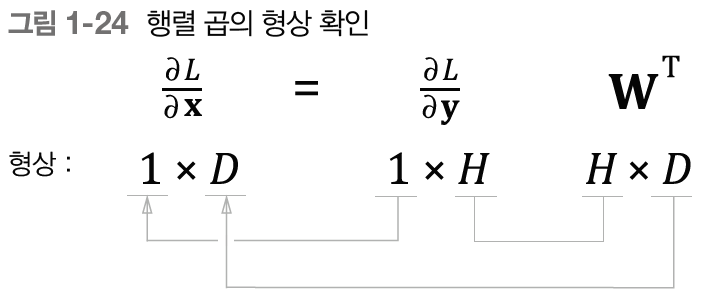

In [36]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-24.png")

이번에는 미니배치 처리를 고려해서 $\mathbf{x}$ 에 $N$ 개의 데이터가 담겨 있다고 가정한다. 그러면 $\mathbf{x}, \mathbf{W}, \mathbf{y}$ 의 형상은 각각 $N \times D, D \times H, N \times H$ 가 되고, 역전파의 계산 그래프는 다음과 같게 된다.

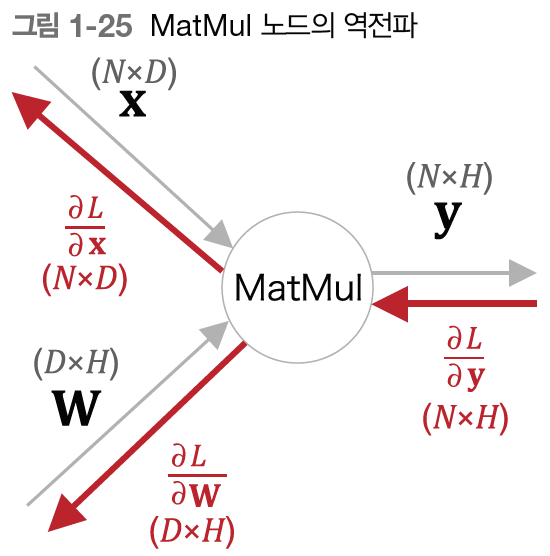

In [37]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-25.png")

행렬의 형상에 주목하여 정합성이 유지되도록 행렬 곱을 조합하면, [그림 1-26]과 같이 행렬 곱의 역전파를 유도할 수 있다.

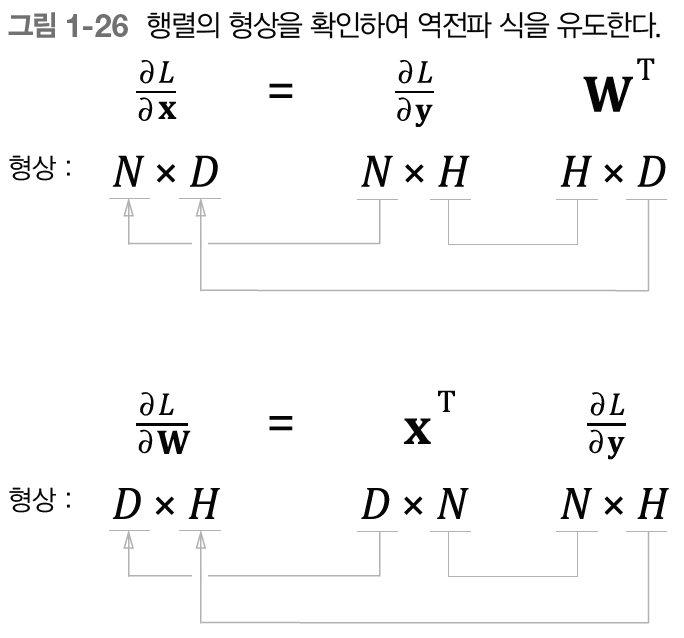

In [38]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-26.png")

이제 MatMul 노드를 하나의 계층으로 구현해본다.

In [39]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

여기서, 기울기 값을 설정하는 `grads[0][...] = dW` 코드에서 점 3개로 이뤄진 생략 기호(...)를 사용했다. 이렇게 하면 넘파이 배열이 가리키는 메모리 위치를 고정시킨 다음, 그 위치에 원소들을 덮어쓰게 된다.  

$\textbf{WARNING}$
`grads[0] = dW` 처럼 '할당'해도 되지만, '생략 기호'는 넘파이 배열의 '덮어쓰기'를 수행한다. 결국 얕은 복사(shallow copy)냐 깊은 복사(deep copy)냐의 차이이다. `grads[0] = dW` 처럼 그냥 할당하면 얕은 복사가 이뤄지고 `grads[0][...] = dW` 처럼 덮어쓰면 깊은 복사가 이뤄진다.

생략기호에 대해서 구체적인 예를 가지고 이해해본다.

In [40]:
a = np.array([1,2,3])
b = np.array([4,5,6])

이 상태에서 `a = b` 와 `a[...] = b` 모두 `a`에는 `[4, 5, 6]` 이 할당된다. 그러나 두 경우에 `a`가 가리키는 메모리의 위치는 서로 다르다. 이러한 메모리를 단순화해서 시각화하면 다음과 같다.

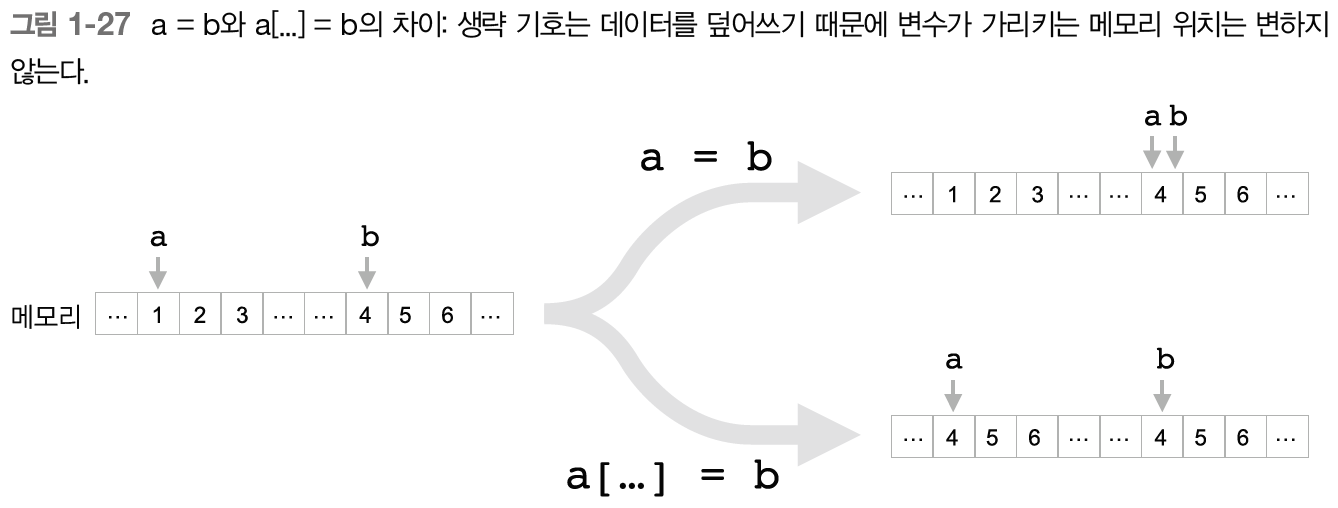

In [41]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-27.png")

위 그림과 같이 `a = b` 에서는 `a` 가 가리키는 메모리 위치가 `b` 와 같아진다. 실제 데이터 (4, 5, 6) 은 복제되지 않는다는 뜻으로 이를 '얕은 복사' 라고 한다. 한편, `a[...] = b` 의 경우 `a`의 메모리 위치는 변하지 않고, 대신 `a` 가 가리키는 메모리 위치에 `b` 의 원소가 복제된다. 실제 데이터가 복제된다는 뜻에서 이 방식을 '깊은 복사'라고 한다.

이렇게 메모리 주소를 고정해서 그 주소에 파라미터를 갱신하는 방식을 채택하면, `grads`를 다루기가 더 쉬워진다.

$\textbf{NOTE}$
 `grads` 리스트에는 각 (계층의) 매개변수의 기울기를 저장한다. 이때 `grads` 리스트의 각 원소는 넘파이 배열이며, 각 계층을 생성할 때 한 번만 생성한다. 그 후로는 항상 '생략 기호'를 사용하므로, 이 넘파이 배열의 메모리 주소가 변하는 일 없이 항상 값을 덮어쓰게 된다. 이렇게 하면 기울기를 그룹화하는 작업을 최초에 한 번만 하면 된다는 장점이 있다.

### 1.3.5 기울기 도출과 역전파 구현

이번 절에서는 Sigmoid 계층, 완전연결계층의 Affine 계층, Softmax with Loss 계층을 구현한다.

#### Sigmoid 계층

시그모이드 함수를 수식으로 쓰면 $y = \tfrac{1}{1 + \exp(-x)}$ 이다. 그리고 그 미분은 다음과 같다.

\begin{equation*}
    \cfrac{\partial y}{\partial x} = y (1-y)
    \tag{1.15}
\end{equation*}

위 식으로부터 Sigmoid 계층의 계산 그래프를 다음 그림처럼 그릴 수 있다.

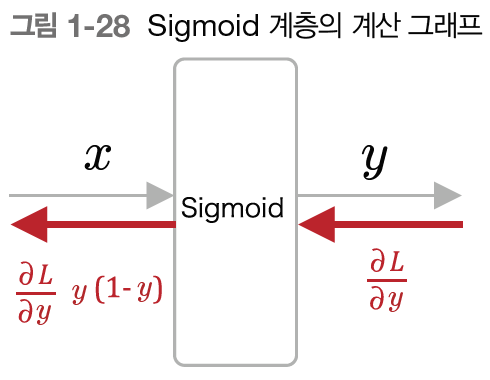

In [42]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-28.png")

Sigmoid 계층의 파이썬 구현은 다음과 같다.

In [43]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

#### Affine 계층

앞에서와 같이 Affine 계층의 순전파는 `y = np.matmul(x,W) + b` 로 구현할 수 있다. 여기서 편향을 더할 때는 넘파이의 브로드캐스트가 사용된다. 그 점을 명시적으로 나타내면 Affine 계층의 계산 그래프는 [그림 1-29]처럼 그릴 수 있다.

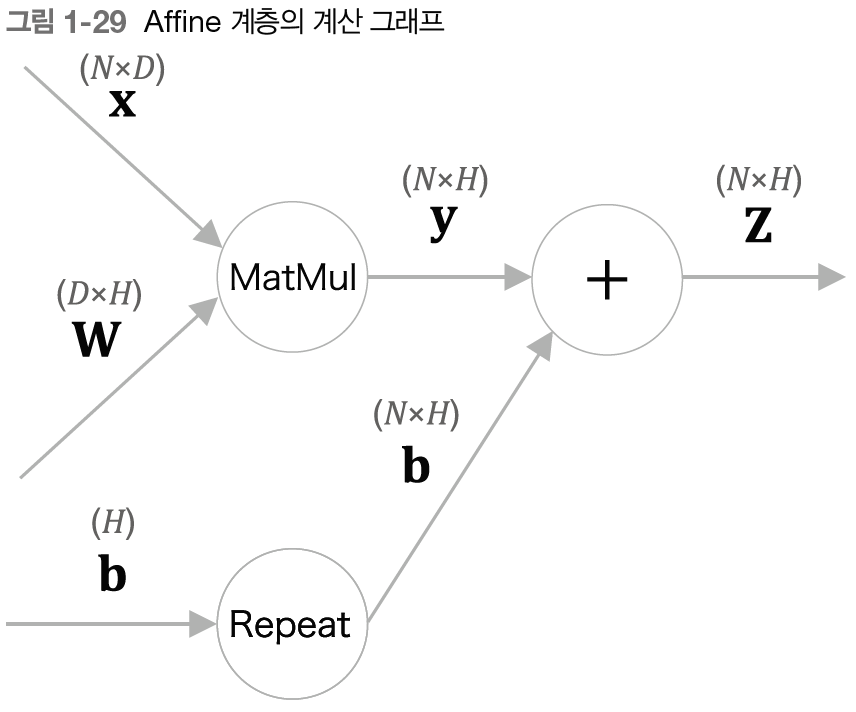

In [44]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-29.png")

위 그림과 같이 MatMul 노드로 행렬 곱을 계산하고 편향은 Repeat 노드에 의해 복제된 후 더해진다. (Repeat 노드가 수행하는 복제가 넘파이의 브로드캐스트 기능에 해당한다) 이를 파이썬 코드로 쓰면 다음과 같다.

In [45]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

#### Softmax with Loss 계층

소프트맥스 함수와 교차 엔트로피 오차는 Softmax with Loss라는 하나의 계층으로 구현할 수 있다. 이 계층의 계산 그래프 그림은 다음과 같다.

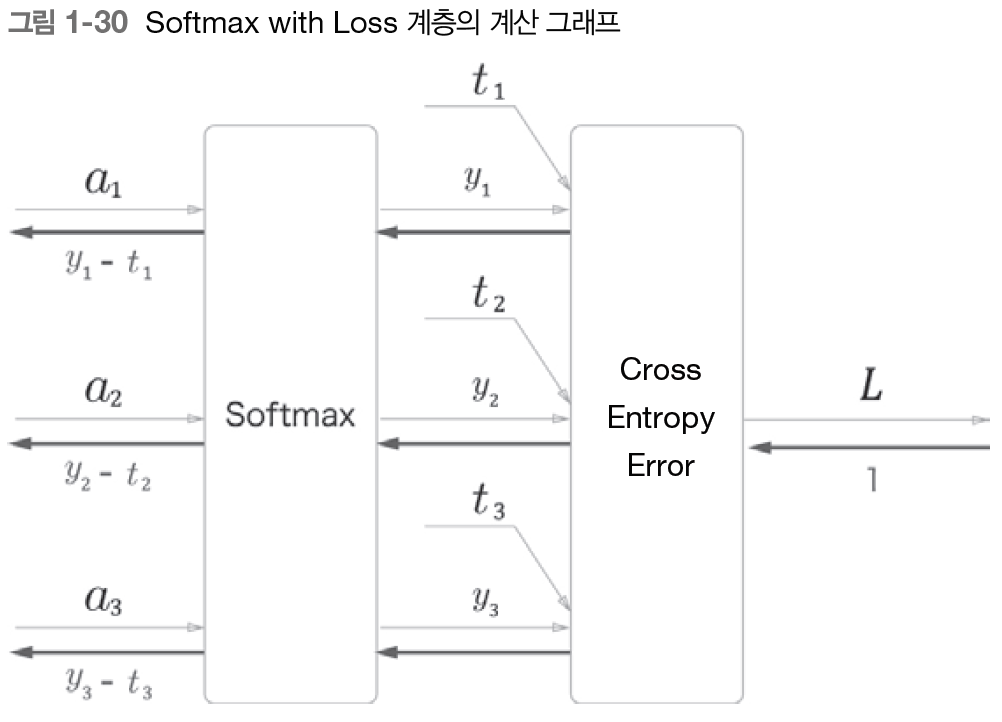

In [46]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-30.png")

$\textbf{NOTE}$
 [그림 1-30]에서 주목할 부분은 역전파의 결과이다. Softmax 계층의 역전파는 $(y_1 - t_1, y_2 - t_2, y_3 - t_3)$ 으로 깔끔하게 떨어진다. $(y_1, y_2, y_3)$ 는 Softmax 계층의 출력이고, $(t_1, t_2, t_3)$ 는 정답 레이블로, Softmax 계층의 역전파는 자신의 출력과 정답 레이블의 차이라는 뜻이다. 이와 같이 신경망의 역전파는 이러한 차이(오차)를 앞 계층에 전달해주는 것이므로, 신경망 학습에서 아주 중요한 성질이라고 할 수 있다.

파이썬 구현은 다음과 같다.

In [47]:
def softmax(x: np.ndarray) -> np.ndarray:
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


def cross_entropy_error(y : np.ndarray, t : np.ndarray):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0] # y의 형상은 (배치 크기, 클래스 개수)

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size # t가 원핫 벡터이기에 t를 곱하는 계산을 할 필요가 없다.


class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x : np.ndarray, t : np.ndarray):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

### 1.3.6 가중치 갱신

오차역전파법으로 기울기를 구했으면, 그 기울기를 사용해서 신경망의 매개변수를 갱신할 수 있다. 이때 신경망의 학습은 다음 순서로 수행한다.

- $\textbf{1단계 : 미니배치}$
  - 훈련 데이터 중에서 무작위로 다수의 데이터를 골라낸다.
- $\textbf{2단계 : 기울기 계산}$
  - 오차역전파법으로 각 가중치 매개변수에 대한 손실 함수의 기울기를 구한다.
- $\textbf{3단계 : 매개변수 갱신}$
  - 기울기를 사용해서 가중치 매개변수를 갱신한다.
- $\textbf{4단계 : 반복}$
  - 1 ~ 3 단계를 필요한 만큼 반복한다.

3단계에서 수행하는 가중치 갱신 기법의 종류는 아주 다양한데, 여기에서는 그중 가장 단순한 $\textbf{확률적 경사하강법}^{\text{Stochastic Gradient Descent}} (SGD)$ 을 구현해보도록 한다.

SGD는 단순한 방법이다. (현재의) 가중치를 기울기 방향으로 일정한 거리만큼 갱신하는 기법이다. 수식으로는 다음과 같다.

\begin{equation*}
    \mathbf{W} \leftarrow \mathbf{W} - \eta \cfrac{\partial L}{\partial \mathbf{W}}
    \tag{1.16}
\end{equation*}

SGD를 파이썬으로 구현해보도록 한다. 매개변수를 갱신하는 클래스는 `update(params, grads)` 라는 공통 메서드를 갖도록 구현한다. 이 메서드의 인수 `params`에는 신경망의 가중치가, `grads` 에는 기울기가 각각 리스트로 저장되어 있어야 한다. 그리고 `params` 와 `grads` 리스트에는 대응하는 매개변수와 기울기가 같은 위치(인덱스)에 저장되어 있다고 가정한다. 그러면 SGD는 다음과 같이 구현할 수 있다.

In [48]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

이 SGD 클래스를 사용하면 신경망의 매개변수 갱신을 다음과 같이 수행할 수 있다.

```python

model = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)
    loss = model.forward(x_batch, t_batch)
    model.backward()
    optimizer.update(model.params, model.grads)
    ...
```

## 1.4 신경망으로 문제를 풀다

이제 간단한 데이터셋으로 신경망을 학습시켜 보도록 한다.

### 1.4.1 스파이럴 데이터셋

스파이럴 데이터셋은 다음 코드를 통해 읽을 수 있다.

In [50]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)     # (300, 2)
print('t', t.shape)     # (300, 3)

x (300, 2)
t (300, 3)


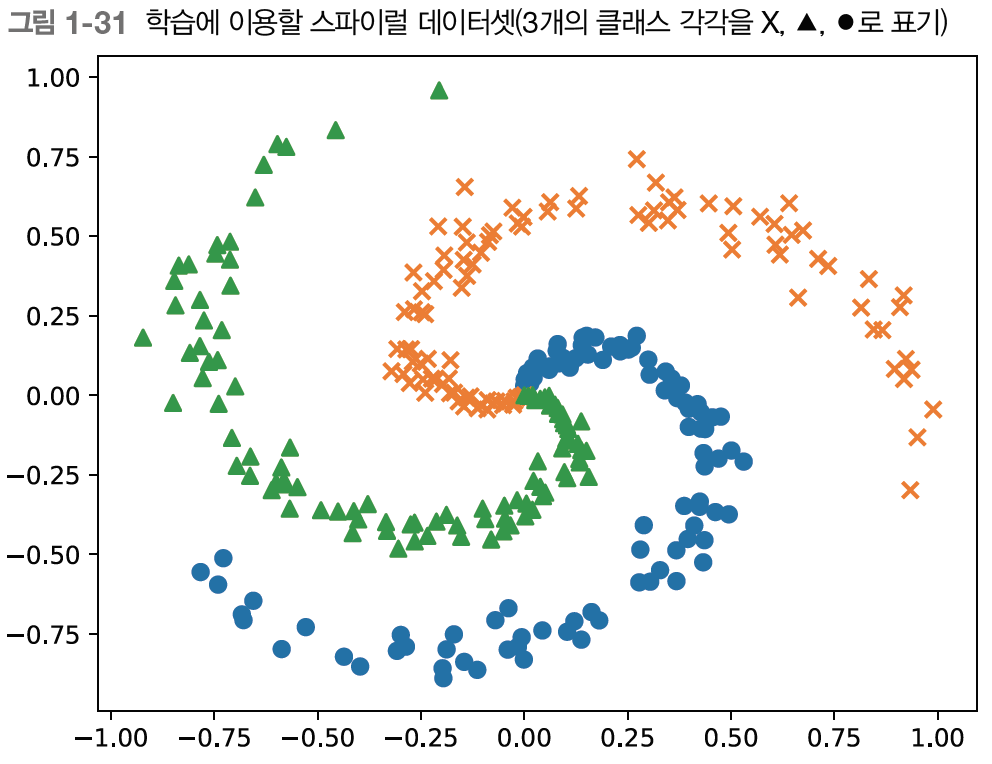

In [51]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-31.png")

[그림 1-31]처럼 입력은 2차원 데이터이고, 분류할 클래스 수는 3개가 있다. 이 그래프를 보면 직선만으로는 클래스들을 분리할 수 없음을 알 수 있다. 따라서 비선형 분리를 학습해야 한다. (비선형 함수 시그모이드를 활성화 함수로 사용하는, 은닉층이 있는)

### 1.4.2 신경망 구현

이번 절에서는 은닉층이 하나인 신경망을 구현한다. chapter01/two_layer_net.py 를 참조한다.

### 1.4.3 학습용 코드

이어서 학습을 수행하는 코드를 본다. 이 코드에서는 학습 데이터를 읽어 들여 신경망과 옵티마이저를 생성한다. 그리고 앞 절에서 본 학습의 네 단계의 절차대로 학습을 수행한다. 참고로 머신러닝 분야에서는 문제를 풀기 위해서 설계한 기법을 가리켜 보통 '모델'이라고 한다. 학습용 코드는 chapter01/train_custom_loop.py 를 참조한다.

이 코드를 실행하면 터미널에 출력되는 손실 값이 순조롭게 낮아지는 것을 알 수 있다. 그리고 그 결과를 그래프로 그린 것이 [그림 1-32]이다.

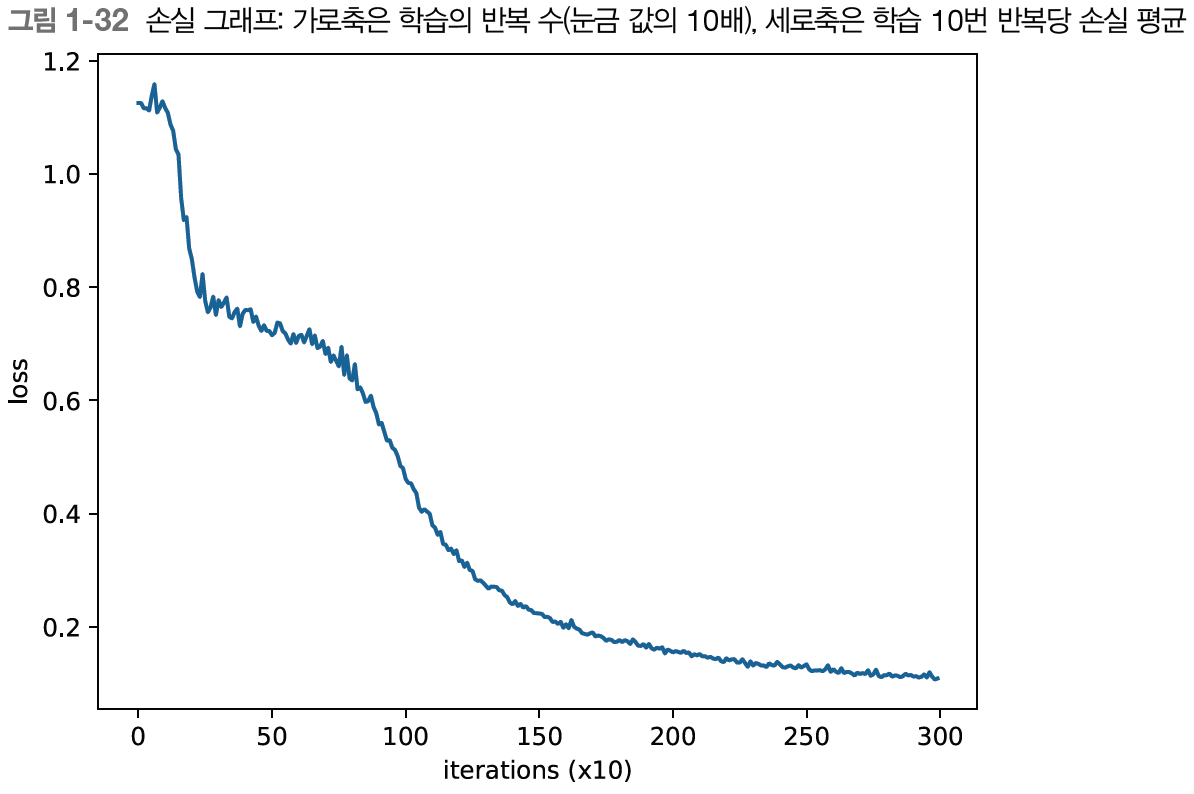

In [53]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-32.png")

위에서 보듯, 학습을 진행함에 따라 손실이 줄어들고 있음을 알 수 있다. 신경망이 올바른 방향으로 학습되고 있는 것이다. 학습이 끝난 뒤에 신경망이 영역을 어떻게 분리했는지 시각화하면 다음과 같다. (이를 $\textbf{결정 경계}^{\text{decision boundary}}$ 라고 한다)

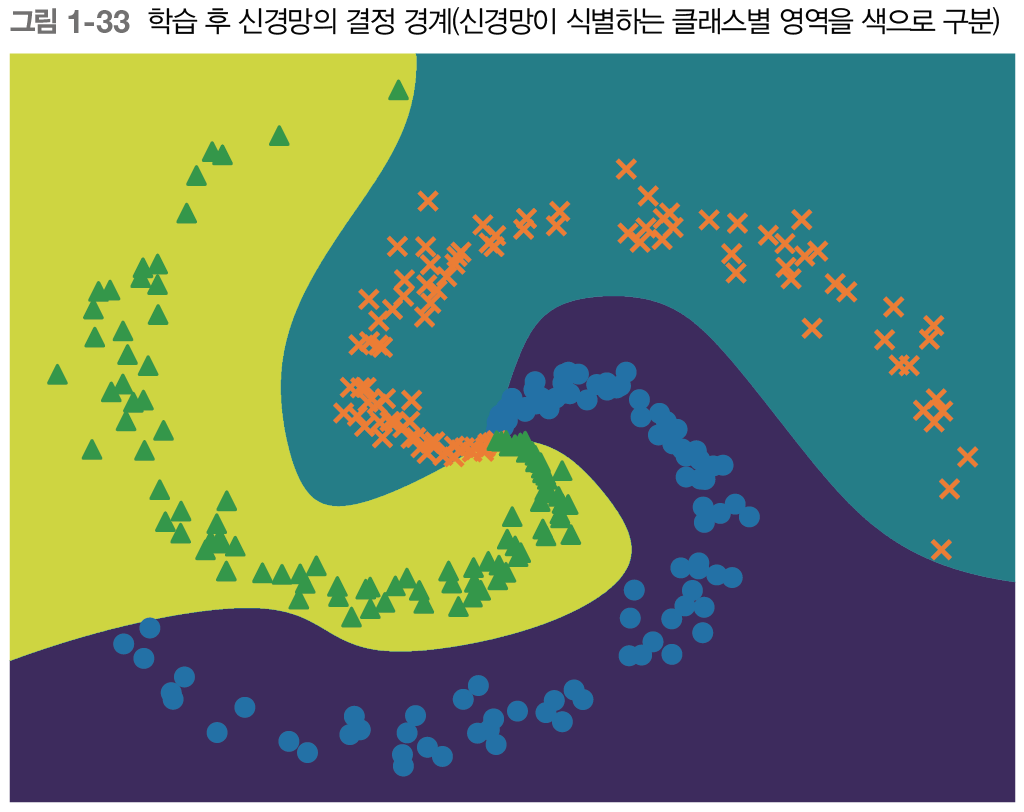

In [54]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\fig 1-33.png")

위 그림에서 보듯 학습된 신경망은 '나선형' 패턴을 올바르게 파악했음을 알 수 있다. 즉, 비선형 분리 영역을 학습할 수 있다. 이처럼 신경망에 은닉층을 추가하면 더 복잡한 표현이 가능해진다. 층을 더 깊게 쌓으면 표현력 또한 더 풍부해지는 것이 딥러닝의 특징이다.

### 1.4.4 Trainer 클래스

이 책에서는 학습을 수행하는 역할을 Trainer 라는 클래스로 제공한다. 내용은 앞 절의 소스 코드와 거의 같다.

Trainer 클래스는 common/trainer.py에 있다. 이 클래스의 초기화 메서드는 신경망과 옵티마이저를 인수로 받는다. 구체적으로는 다음과 같이 사용한다.

```python
model = TwoLayerNet(...)
optimizer = SGD(lr = 0.01)
trainer = Trainer(model, optimizer)
```

그리고 `fit()` 메서드를 호출해서 학습을 시작한다. 이 `fit()` 메서드가 받는 인수는 다음 표와 같다.

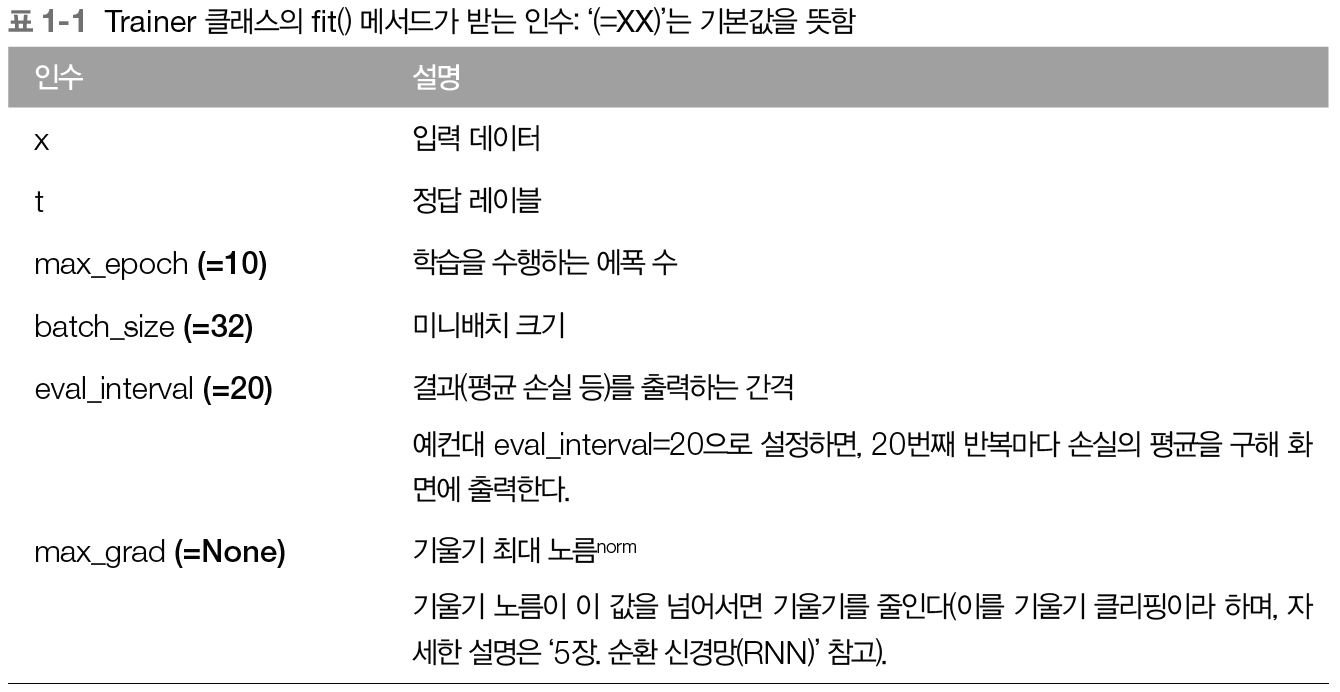

In [55]:
Image.open("C:\\Users\\AAA\\deep-learning-from-scratch-2\\images\\table 1-1.png")

Trainer 클래스는 `plot()` 메서드도 제공한다. 이 메서드는 `fit()` 에서 기록한 손실 (정확하게는 `eval_interval` 시점에 평가된 평균 손실)을 그래프로 그려준다. 이제 Trainer 클래스를 사용해서 학습을 수행하는 코드를 보도록 한다. 코드는 chapter01/train.py 에 있다.

이 코드를 실행하면 이전 절과 같은 신경망 학습이 이뤄진다. 앞에서 본 학습용 코드를 Trainer 클래스에 맡겼기 때문에 코드가 깔끔해진다. 앞으로 학습을 해야 하는 경우 항상 Trainer 클래스를 사용하도록 한다.

## 1.5 계산 고속화

신경망의 학습과 추론에 드는 연산량은 상당하다. 그래서 신경망에서는 얼마나 빠르게 계산하느냐가 매우 중요한 주제이다. 그래서 이번 절에서는 신경망 고속화에 도움되는 '비트 정밀도'와 'GPU'에 관해 가볍게 설명한다.

### 1.5.1 비트 정밀도

넘파이의 부동소수점 수는 기본적으로 64비트 데이터 타입을 사용한다. 실제로 64비트 부동소수점 수가 사용되는지는 다음 코드로 확인할 수 있다.

In [57]:
import numpy as np
a = np.random.randn(3)
print(a, a.dtype)

[ 0.43308608 -1.70561568  0.05331225] float64


넘파이는 64비트 부동소수점 수를 표준으로 사용한다. 그러나 신경망의 추론과 학습은 32비트 부동소수점 수로도 문제없이(인식률을 거의 떨어뜨리지 않고) 수행할 수 있다고 한다. 32비트는 64비트의 절반이므로, 메모리 관점에서 항상 32비트가 더 좋다고 말할 수 있다. 또, 신경망 계산 시 데이터를 전송하는 '버스 대역폭(bus bandwidth)'이 병목이 되는 경우가 왕왕 있다. 이런 경우에도 데이터 타입이 작은 게 유리하다. 마지막으로 계산 속도 측면에서도 32비트 부동소수점 수가 일반적으로 더 빠르다. (CPU나 GPU 아키텍처에 따라 다르다)

이런 이유로 이 책에서는 32비트 부동소수점 수를 우선으로 사용한다. 넘파이에서 32비트 부동소수점 수를 사용하려면 다음과 같이 데이터 타입을 `np.float32` 나 `f` 로 지정한다.

In [58]:
b = np.random.randn(3).astype(np.float32)
print(b, b.dtype)

c = np.random.randn(3).astype('f')
print(c, c.dtype)

[-0.7167199  -0.90132767 -1.4111348 ] float32
[2.651132   0.03925323 1.4524777 ] float32


또한 신경망 추론으로 한정하면, 16비트 부동소수점 수를 사용해도 인식률이 거의 떨어지지 않는다. 그리고 넘파이에도 16비트 부동소수점 수가 준비되어 있다. 다만, 일반적으로 CPU와 GPU는 연산 자체를 32비트로 수행한다. 따라서 16비트 부동소수점 수로 변환하더라도 계산 자체는 32비트로 이뤄져서 처리 속도 측면에서는 혜택이 없을 수 있다.

그러나 학습된 가중치를 파일에 저장할 때는 16비트 부동소수점 수가 여전히 유효하다. 가중치 데이터를 16비트로 저장하면 32비트를 쓸 때보다 절반의 용량만 사용하기 때문이다. 그래서 앞으로 학습된 가중치를 저장하는 경우에 한해 16비트 부동소수점 수로 변환하도록 한다.

### 1.5.2 GPU(쿠파이)

딥러닝의 계산은 대량의 곱하기 연산으로 구성된다. 이 대량의 곱하기 연산 대부분은 병렬로 계산할 수 있는데, 바로 이 점에서 CPU보다 GPU가 유리하다. 대부분의 딥러닝 프레임워크가 CPU 뿐 아니라 GPU도 지원하는 이유가 바로 이것이다.

이 책의 예제 중에는 쿠파이라는 파이썬 라이브러리를 사용할 수 있는 게 있다. 쿠파이는 GPU를 이용해서 병렬 계산을 수행해주는 라이브러리이다.

쿠파이를 사용하면 엔비디아 GPU를 사용해서 간단하게 병렬 계산을 수행할 수 있따. 더욱 중요한 점은 쿠파이는 넘파이와 호환되는 API를 제공한다는 사실이다.

In [59]:
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')
print(x)
x.sum(axis=1)
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]
[[0. 1. 2.]
 [3. 4. 5.]]


이와 같이 쿠파이의 사용법은 기본적으로 넘파이와 같다. 사용법은 같지만 활용되는 하드웨어가 GPU인 것이다.

## 1.6 정리

$\textbf{이번 장에서 배운 내용}$
- 신경망은 입력층, 은닉층, 출력층을 가진다.
- 완전연결계층에 의해 선형 변환이 이뤄지고, 활성화 함수에 의해 비선형 변환이 이뤄진다.
- 완전연결계층이나 미니배치 처리는 행렬로 모아 한꺼번에 계산할 수 있다.
- 오차역전파법을 사용하여 신경망의 손실에 관한 기울기를 효율적으로 구할 수 있다.
- 신경망이 수행하는 처리는 계산 그래프로 시각화할 수 있으며, 순전파와 역전파를 이해하는 데 도움이 된다.
- 신경망의 구성요소들을 '계층'으로 모듈화해두면, 이를 조립하여 신경망을 쉽게 구성할 수 있다.
- 신경망 고속화에는 GPU를 이용한 병렬 계산과 데이터의 비트 정밀도가 중요하다.